# Exercise 9 - [9660] KMeans
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/FacebookLive_sellers_Thailand.csv

## Exercise 9 Requirements
* Load data file into dataframe
* Examine data
* Prepare data (follow instructions in Cells)
* Train KMeans classifier with default hyperparameters
  * Display inertia_, silhouette_score, and calinski_harabasz_score
* Determine optimal K value (using any metric learned in class)
  * Generate and display elbow plot
* Re-train KMeans classifier with optimal K value
  * Display inertia_, silhouette_score, and calinski_harabasz_score

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

### Load data

In [2]:
# Load data file
# Use column 'status_id' as the index column
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/FacebookLive_sellers_Thailand.csv', index_col='status_id')

### Examine data

In [3]:
# Display first few rows
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,
1,video,4/22/18 6:00,529,512,262,432,92,3,1,1,0
2,photo,4/21/18 22:45,150,0,0,150,0,0,0,0,0
3,video,4/21/18 6:17,227,236,57,204,21,1,1,0,0
4,photo,4/21/18 2:29,111,0,0,111,0,0,0,0,0
5,photo,4/18/18 3:22,213,0,0,204,9,0,0,0,0


In [4]:
# Check for missing values
df.isnull().sum()

,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0


### Prepare data

In [6]:
# Drop unnecessary columns: status_published and status_type
df = df.drop(['status_published', 'status_type'], axis=1)

In [7]:
# Display first few rows of updated dataframe
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,
1,529,512,262,432,92,3,1,1,0
2,150,0,0,150,0,0,0,0,0
3,227,236,57,204,21,1,1,0,0
4,111,0,0,111,0,0,0,0,0
5,213,0,0,204,9,0,0,0,0


In [8]:
# Standardize variables
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

### Train KMeans classifier (with default hyperparameters)

In [9]:
# Instantiate KMeans classifier
KM = KMeans(n_init='auto', random_state=42)

In [10]:
# Compute k-means clustering
KM.fit(scaled_df)

KMeans(random_state=42)

In [11]:
# Compute cluster centers and predict cluster index for each sample
cluster_labels = KM.fit_predict(scaled_df)

### Evaluate KMeans model

In [12]:
# Dislay inertia
KM.inertia_

20129.40964005529

In [13]:
# Calculate and display silhouette coefficient
metrics.silhouette_score(scaled_df, cluster_labels)

0.7082222163756745

In [14]:
# Calculate and display Calinski Harabasz score
metrics.calinski_harabasz_score(scaled_df, cluster_labels)

2165.0169916252203

### Determine the optimal K value (using any metric learned in class)

In [15]:
# Find the optimal K value
k_values = range(2, 10)
inertias = []

for k in k_values:
    KM = KMeans(n_clusters=k, n_init='auto', random_state=42)
    KM.fit(scaled_df)
    inertias.append(KM.inertia_)

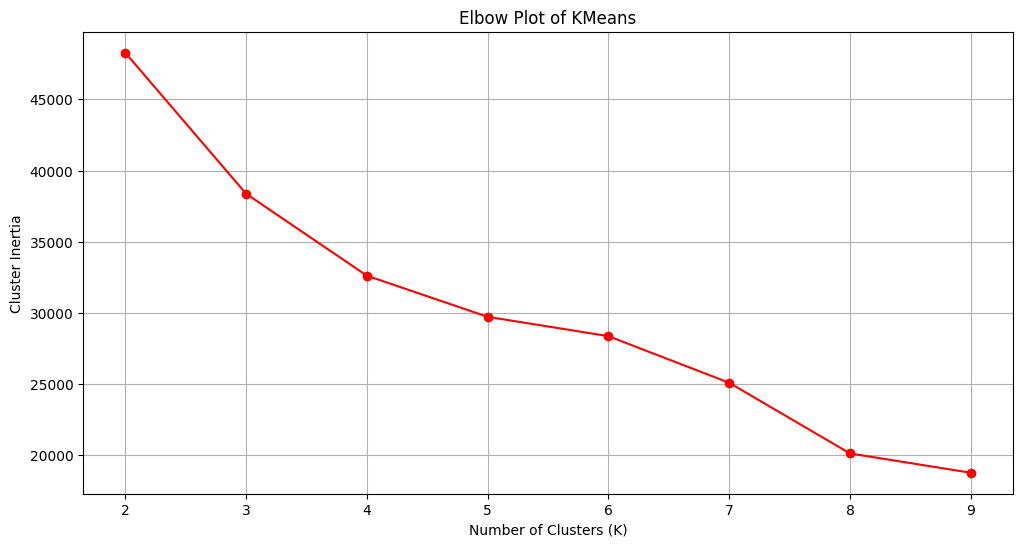

In [16]:
# Generate and display elbow plot
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, inertias, 'o-', color='red')
plt.grid(True)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cluster Inertia")
plt.title("Elbow Plot of KMeans")
plt.show()

### Re-train KMeans classifier with optimal K value

In [25]:
KM = KMeans(n_init='auto', n_clusters=4, random_state=42)
KM.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [26]:
cluster_labels = KM.fit_predict(scaled_df)

### Evaluate optimal KMeans model

In [27]:
# Display model inertia_
KM.inertia_

32616.92777114958

In [28]:
# Calculate silhouette coefficient
metrics.silhouette_score(scaled_df, cluster_labels)

0.7571052403552873

In [29]:
# Calculate Calinski Harabasz score
metrics.calinski_harabasz_score(scaled_df, cluster_labels)

2220.2270063855767